In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_path = "C:/AI_File/AAME.csv"  # 데이터 파일 경로
df = pd.read_csv(file_path)
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [3]:
openValues=df[['Open']]
display(openValues)

,Open
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
10093,2.29
10094,2.25
10095,2.25
10096,2.11


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(openValues)

In [5]:
TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]


In [6]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dense

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))   # 명시적 Input layer
model.add(SimpleRNN(16, activation='tanh', return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=16)



Epoch 1/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0054
Epoch 2/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0028
Epoch 3/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0030
Epoch 4/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0028
Epoch 5/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0029
Epoch 6/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0022
Epoch 7/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0023
Epoch 8/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0028
Epoch 9/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0024
Epoch 10/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0026
Epoch 11/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0024
Epoch 12/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0029
Epoch 13/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0025
Epoch 14/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0026
Epoch 15/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - lo

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


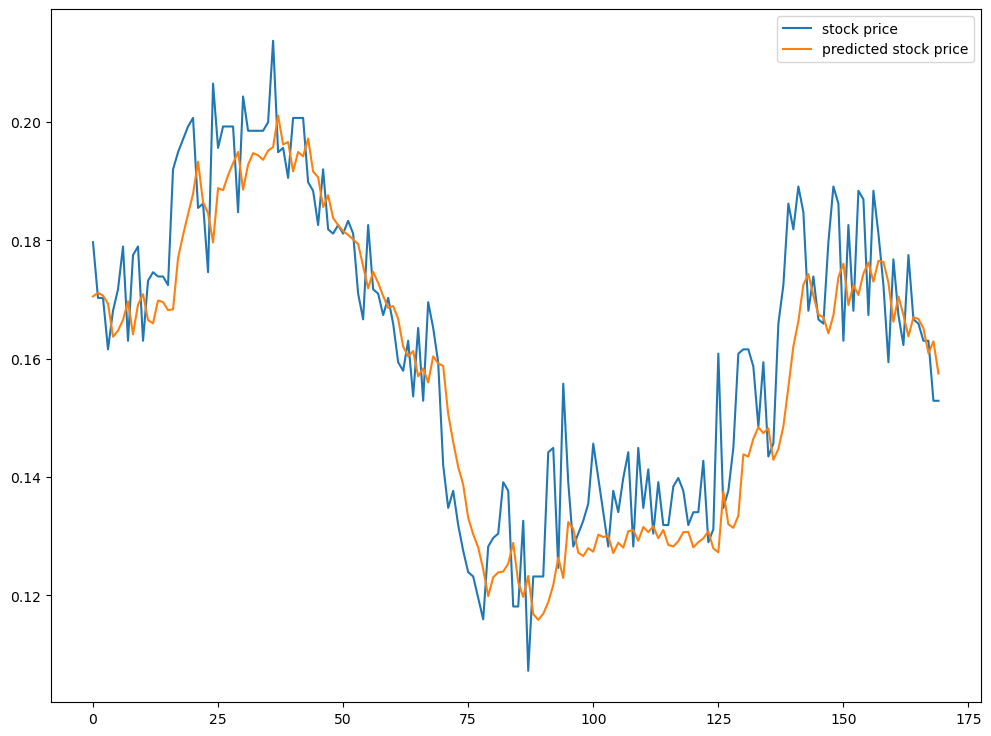

In [8]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE:", mean_squared_error(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("R² score:", r2_score(y_test, pred))

MSE: 0.0001240927566733713
MAE: 0.008843587167788521
R² score: 0.796131881691469
